In [76]:
import pandas as pd


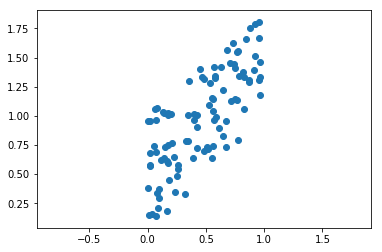

0.7552370010332816


In [94]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

width = np.random.rand(100)
length = width + np.random.rand(100)

grains = np.array([width,length]).T

plt.scatter(width, length)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(width,length)

print(correlation)


### Intrinsic dimensions = number of features needed to approximate the dataset

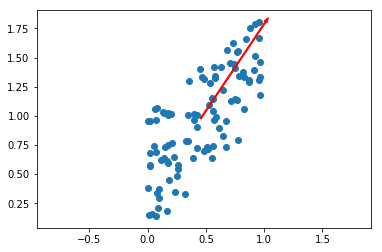

In [103]:
from sklearn.decomposition import PCA
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]  # eigen values or variences

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

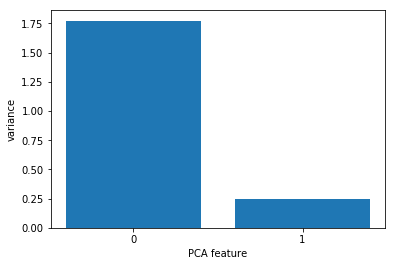

In [104]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(grains)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [114]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(grains)

# Transform the scaled samples: pca_features
pca_features = pca.transform(grains)

# Print the shape of pca_features
print(pca_features.shape)


(100, 2)


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow','dog say bark','lion say cats']
tfidf = TfidfVectorizer()

csr_mat = tfidf.fit_transform(documents)

print(csr_mat.toarray())

words = tfidf.get_feature_names()

print(words)


[[0.         0.54783215 0.         0.         0.72033345 0.42544054]
 [0.65249088 0.         0.65249088 0.         0.         0.38537163]
 [0.         0.54783215 0.         0.72033345 0.         0.42544054]]
['bark', 'cats', 'dog', 'lion', 'meow', 'say']


In [135]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

svd = TruncatedSVD()

kmeans = KMeans()

pipeline = make_pipeline(svd,kmeans)

pipeline.fit(articles)

labels = pipeline.predict(articles)

df = pd.DataFrame({'label': labels, 'article': titles})

print(df.sort_values('label'))


# Non negative matrix factorization

1. Dimension reduction technique
2. NMF models are interpretable
3. easy to interpret means each to explain
4. all observations must be non-negative


NMF expresses images as combination of patterns

NMF expresses documents as combination of topics(or "themes")

In [150]:
from sklearn.decomposition import NMF

model = NMF(6)

model.fit(articles)

nmf_features = model.transform(articles)

print(nmf_features)



NameError: name 'articles' is not defined

In [137]:
import pandas as pd

df = pd.DataFrame(nmf_features,index=titles)

print(df.loc['Anne Hathaway'])

print(df.loc['Denzel Washington'])


NameError: name 'nmf_features' is not defined

In [186]:
pca = PCA(n_components=6)
pca.fit_transform(csr_mat.toarray())

array([[-3.96183801e-01, -5.09352667e-01,  4.21329712e-17],
       [ 7.92367601e-01, -2.51673948e-16,  4.21329712e-17],
       [-3.96183801e-01,  5.09352667e-01,  4.21329712e-17]])

In [187]:
model.fit_transform(csr_mat.toarray())

array([[7.30159023e-04, 0.00000000e+00, 2.91529845e-04, 9.90487585e-01,
        0.00000000e+00, 0.00000000e+00],
       [1.55715946e+00, 2.75608793e-01, 0.00000000e+00, 0.00000000e+00,
        8.04452859e-01, 0.00000000e+00],
       [4.95852912e-04, 0.00000000e+00, 8.59758708e-01, 3.21550879e-05,
        0.00000000e+00, 6.49812951e-01]])

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

In [ ]:
# samples are 2D array of images 800 * 13*8
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

In [ ]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Building a Recommandation using NMF

## strategy
1. Apply NMF to the word-frequency array
2. NMF feature values describe the topics
3. .. so similar documents have similar NMF feature values
4. Compare NMF feature values?

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

# Recommend musical artists part I

In [ ]:
# artists dim [1000*500]
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


# Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so norm_features is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list artist_names.

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())
